I have replicated the implementation from the paper: "[OTIDS: A Novel Intrusion Detection System for In-vehicle Network by Using Remote Frame](https://ieeexplore.ieee.org/document/8476919)". I have used the same dataset as mentioned in the paper. Please find more details in the paper. 


In [22]:
import re

Queue_0153 = []
Queue_01f1 = []
Queue_02c0 = []
Queue_04b1 = []
Queue_0164 = []
Queue_0220 = []
Queue_04b0 = []
Queue_05a0 = []

remote_flag = False
target = None
offset = 0
request_time = 0

In [17]:
Lost_target_0153 = 0
Lost_target_01f1 = 0
Lost_target_02c0 = 0
Lost_target_04b1 = 0
Lost_target_0164 = 0
Lost_target_0220 = 0
Lost_target_04b0 = 0 
Lost_target_05a0 = 0


def lost_reply(target):
    #print("Lost reply")
    global Lost_target_0153
    global Lost_target_01f1
    global Lost_target_02c0
    global Lost_target_04b1
    global Lost_target_0164
    global Lost_target_0220
    global Lost_target_04b0
    global Lost_target_05a0

    if target == "0153":
        Lost_target_0153 += 1
    if target == "01f1":
        Lost_target_01f1 += 1
    if target == "02c0":
        Lost_target_02c0 += 1
    if target == "04b1": 
        Lost_target_04b1 += 1
    if target == "0164": 
        Lost_target_0164 += 1
    if target == "0220":
        Lost_target_0220 += 1
    if target == "04b0":
        Lost_target_04b0 += 1
    if target == "05a0":
        Lost_target_05a0 += 1


In [18]:
Instant_target_0153 = 0
Instant_target_01f1 = 0
Instant_target_02c0 = 0
Instant_target_04b1 = 0
Instant_target_0164 = 0
Instant_target_0220 = 0
Instant_target_04b0 = 0
Instant_target_05a0 = 0

def instant_reply(target):
    #print("Instant reply")
    global Instant_target_0153
    global Instant_target_01f1
    global Instant_target_02c0
    global Instant_target_04b1
    global Instant_target_0164
    global Instant_target_0220
    global Instant_target_04b0
    global Instant_target_05a0

    if target == "0153":
        Instant_target_0153 += 1
    if target == "01f1":
        Instant_target_01f1 += 1
    if target == "02c0":
        Instant_target_02c0 += 1
    if target == "04b1": 
        Instant_target_04b1 += 1
    if target == "0164": 
        Instant_target_0164 += 1
    if target == "0220":
        Instant_target_0220 += 1
    if target == "04b0":
        Instant_target_04b0 += 1
    if target == "05a0":
        Instant_target_05a0 += 1

In [19]:
# Define a regular expression pattern to match the relevant lines
pattern = re.compile(r'Timestamp:\s+([\d.]+)\s+ID:\s+([\da-fA-F]+)\s+([\da-fA-F\s]+)')

# Open the text file
with open('./data/DoS_attack_dataset.txt', 'r') as file:
    # Iterate through each line
    for line in file:
        # Try to match the pattern
        match = pattern.match(line)
        if match:
            # Extract timestamp, ID, and rtr
            timestamp = match.group(1)
            time = float(timestamp)
            can_id = match.group(2)
            rtr = match.group(3).strip().split()

            if rtr[0] == "100":
                remote_flag = True
                target = can_id
                off_set = 0
                request_time = time
                # print(target)
                continue

            if remote_flag:
                off_set = off_set + 1
                # print(off_set)
                if off_set > 6:
                    lost_reply(can_id)
                    remote_flag = False
                    continue
                if can_id == target:
                    interval = time - request_time
                    if target == "0153":
                        Queue_0153.append((off_set, interval))
                    if target == "01f1":
                        Queue_01f1.append((off_set, interval))
                    if target == "02c0":
                        Queue_02c0.append((off_set, interval))
                    if target == "04b1":
                        Queue_04b1.append((off_set, interval))
                    if target == "0164":
                        Queue_0164.append((off_set, interval))
                    if target == "0220":
                        Queue_0220.append((off_set, interval))
                    if target == "04b0":
                        Queue_04b0.append((off_set, interval))
                    if target == "05a0":
                        Queue_05a0.append((off_set, interval))
                    
                    if off_set == 1:
                        instant_reply(can_id)
                    remote_flag = False

print(Queue_0153)

[(6, 0.0014749999999999971), (2, 0.0004959999999999964), (2, 0.0004950000000000232), (1, 0.00023200000000000998), (1, 0.00020100000000000673), (2, 0.0004929999999999657), (2, 0.0005260000000000264), (1, 0.00027599999999994296), (1, 0.00024299999999999322), (1, 0.00023499999999998522), (1, 0.00022300000000008424), (1, 0.00021099999999996122), (1, 0.00022100000000002673), (2, 0.0004990000000000272), (2, 0.0004949999999999122), (2, 0.0004909999999997972), (2, 0.0004940000000002165), (3, 0.0007260000000002265), (6, 0.0014959999999999418), (2, 0.000500000000000167), (2, 0.0004949999999999122), (1, 0.00019599999999986295), (1, 0.00024500000000005073), (2, 0.0004910000000002412), (3, 0.0020299999999999763), (2, 0.0004569999999999297), (1, 0.0002460000000001905), (2, 0.0005079999999999529), (2, 0.0004990000000000272), (1, 0.0002409999999999357), (1, 0.00019999999999953388), (5, 0.0012259999999999494), (1, 0.0002830000000004773), (2, 0.0005030000000001422), (4, 0.0031719999999992865), (3, 0.000

In [20]:
print(Instant_target_0153)

299


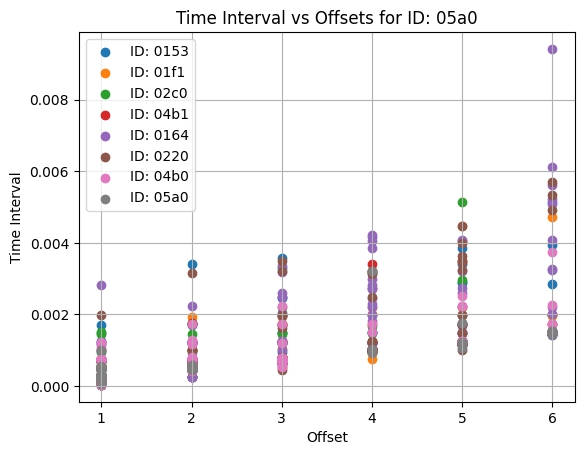

In [21]:
import matplotlib.pyplot as plt

# Create a function to plot the graph for a specific queue
def plot_queue(queue, title):
    offsets = [entry[0] for entry in queue]
    intervals = [entry[1] for entry in queue]
    plt.scatter(offsets, intervals, label=title)
    plt.xlabel('Offset')
    plt.ylabel('Time Interval')
    plt.title('Time Interval vs Offsets for ' + title)
    plt.legend()

# Plotting for each queue
plot_queue(Queue_0153, "ID: 0153")
plot_queue(Queue_01f1, "ID: 01f1")
plot_queue(Queue_02c0, "ID: 02c0")
plot_queue(Queue_04b1, "ID: 04b1")
plot_queue(Queue_0164, "ID: 0164")
plot_queue(Queue_0220, "ID: 0220")
plot_queue(Queue_04b0, "ID: 04b0")
plot_queue(Queue_05a0, "ID: 05a0")

# Show the plot
plt.grid(True)
plt.show()
